In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_parquet("/content/drive/MyDrive/IE6400/Project/with_labels_full_data.parquet")

In [4]:
vitals_cols = ['age', 'avg_bicarbonate', 'std_bicarbonate',
       'avg_blood_glucose', 'std_blood_glucose', 'avg_blood_urea_nitrogen',
       'std_blood_urea_nitrogen', 'avg_creatinine', 'std_creatinine',
       'avg_hematrocrit', 'std_hematrocrit', 'avg_platelet_count',
       'std_platelet_count', 'avg_potasssium', 'std_potasssium', 'avg_sodium',
       'std_sodium', 'avg_white_blood_cells', 'std_white_blood_cells',
       'avg_dias_press', 'std_dias_press', 'avg_hr', 'std_hr', 'avg_resp_rate',
       'std_resp_rate', 'avg_spo2', 'std_spo2', 'avg_sys_press',
       'std_sys_press', "labels_kmeans", "label_average", "label_ward", "label_complete"]

<Figure size 1920x1440 with 0 Axes>

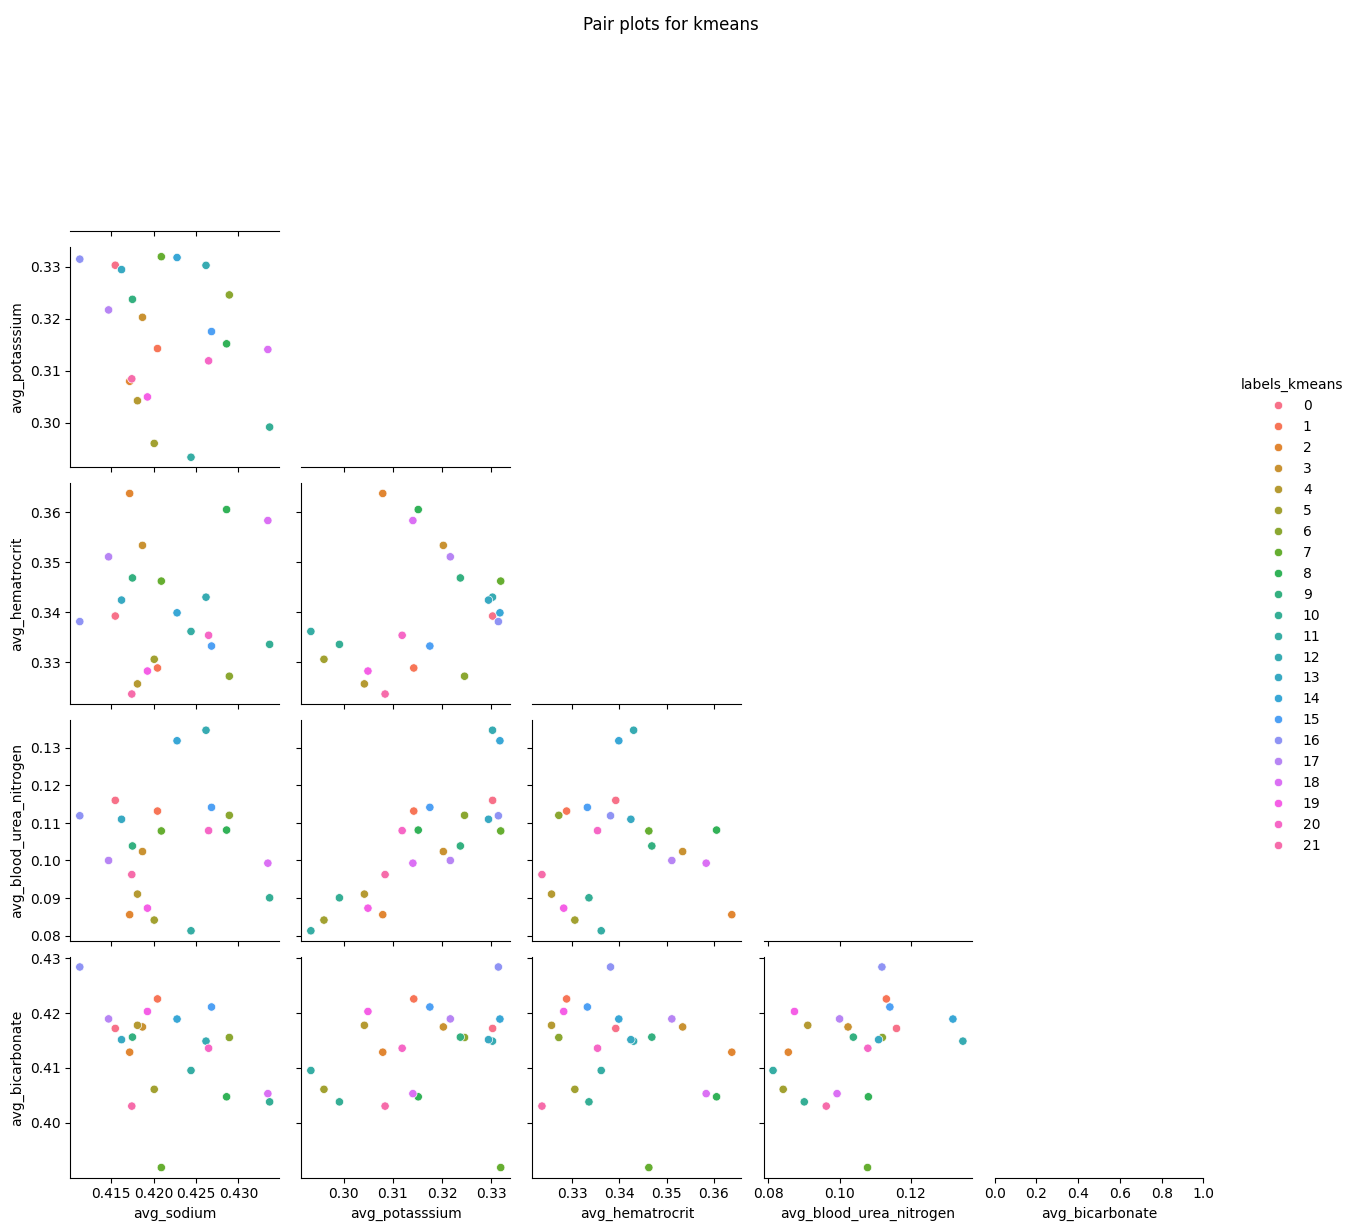

<Figure size 1920x1440 with 0 Axes>

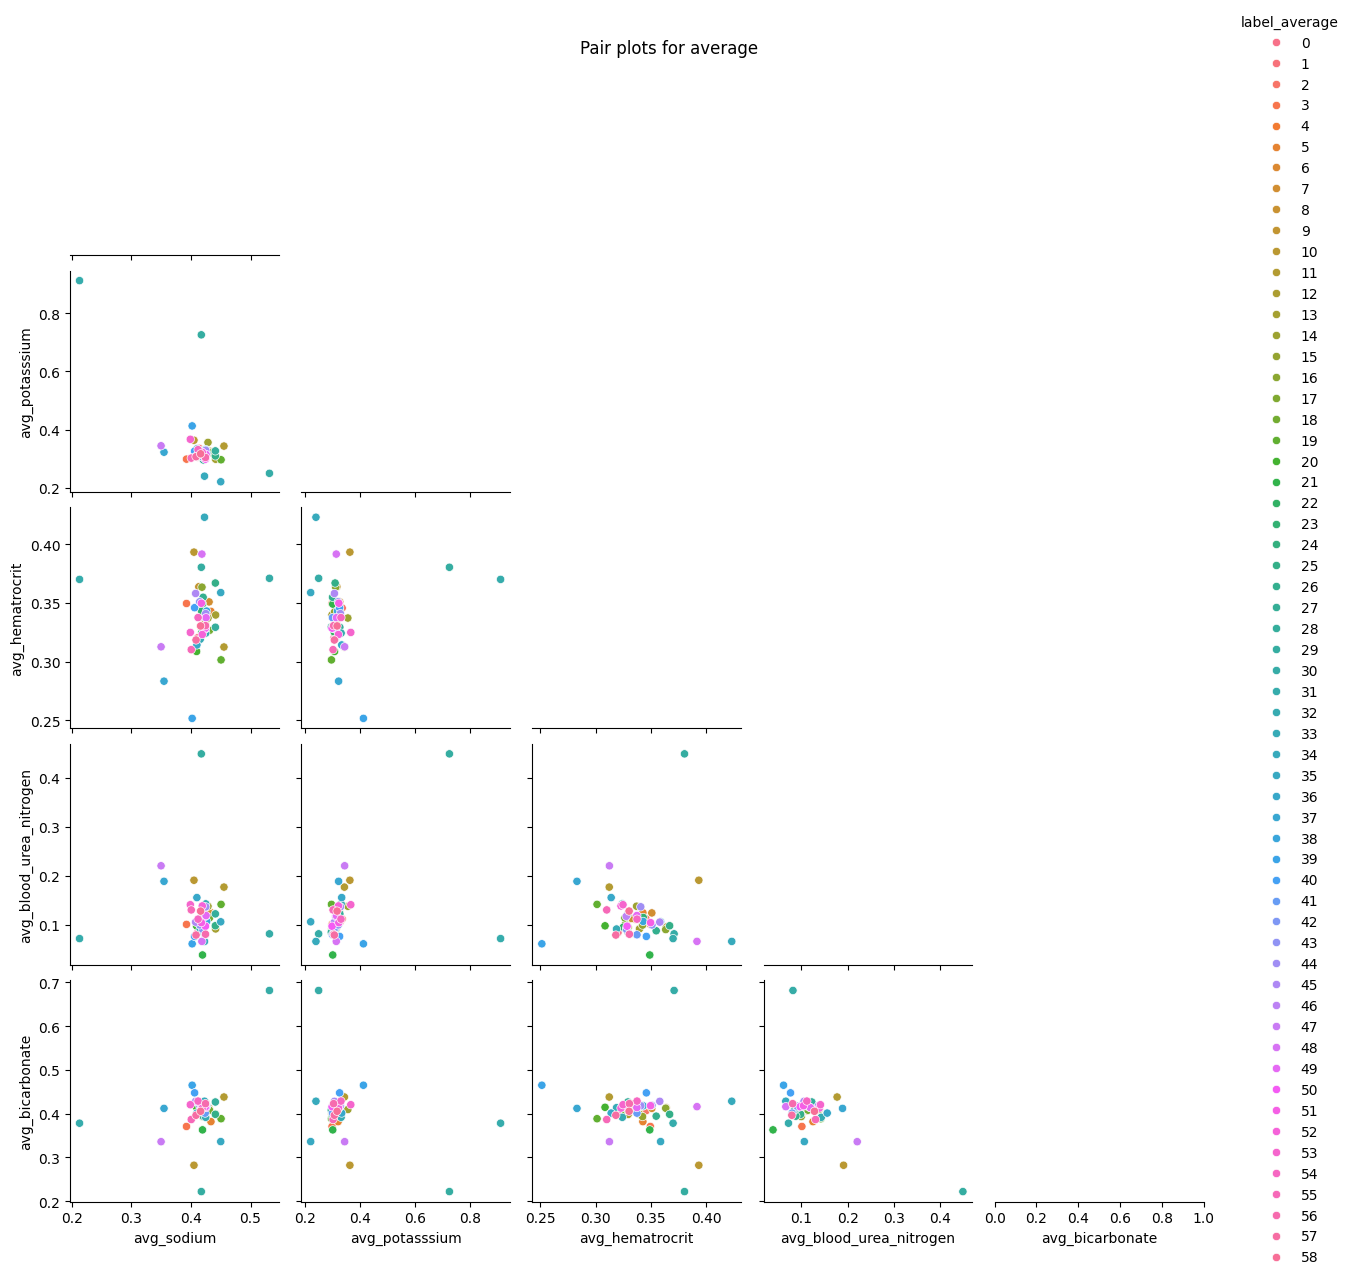

<Figure size 1920x1440 with 0 Axes>

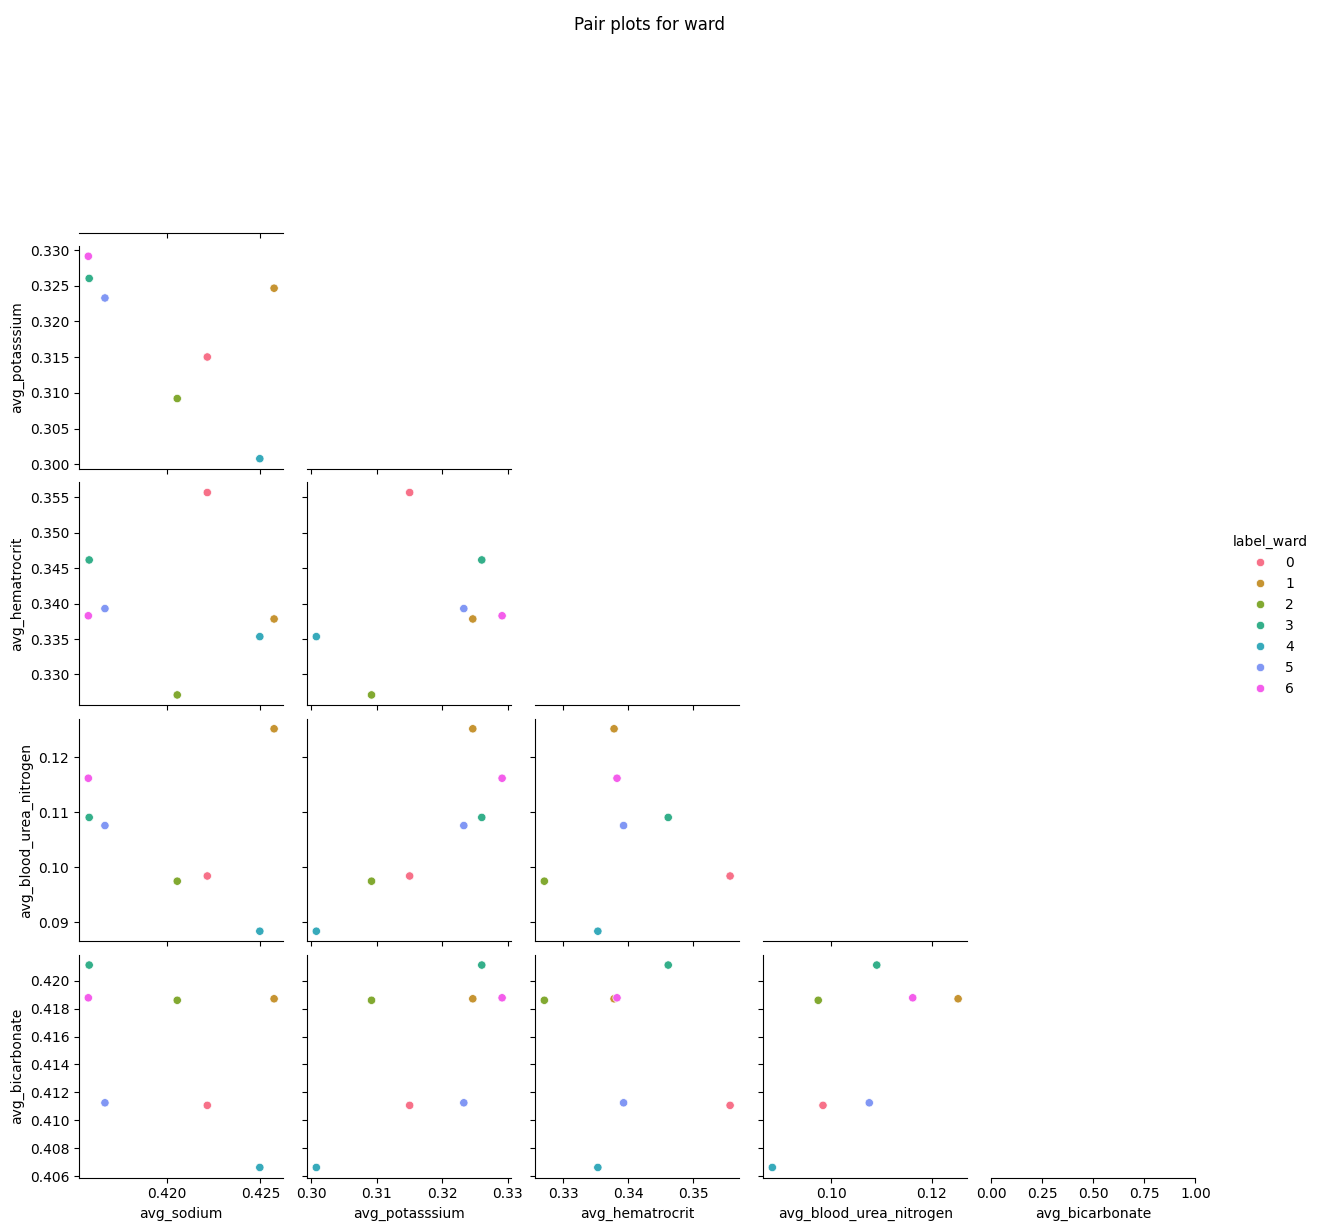

<Figure size 1920x1440 with 0 Axes>

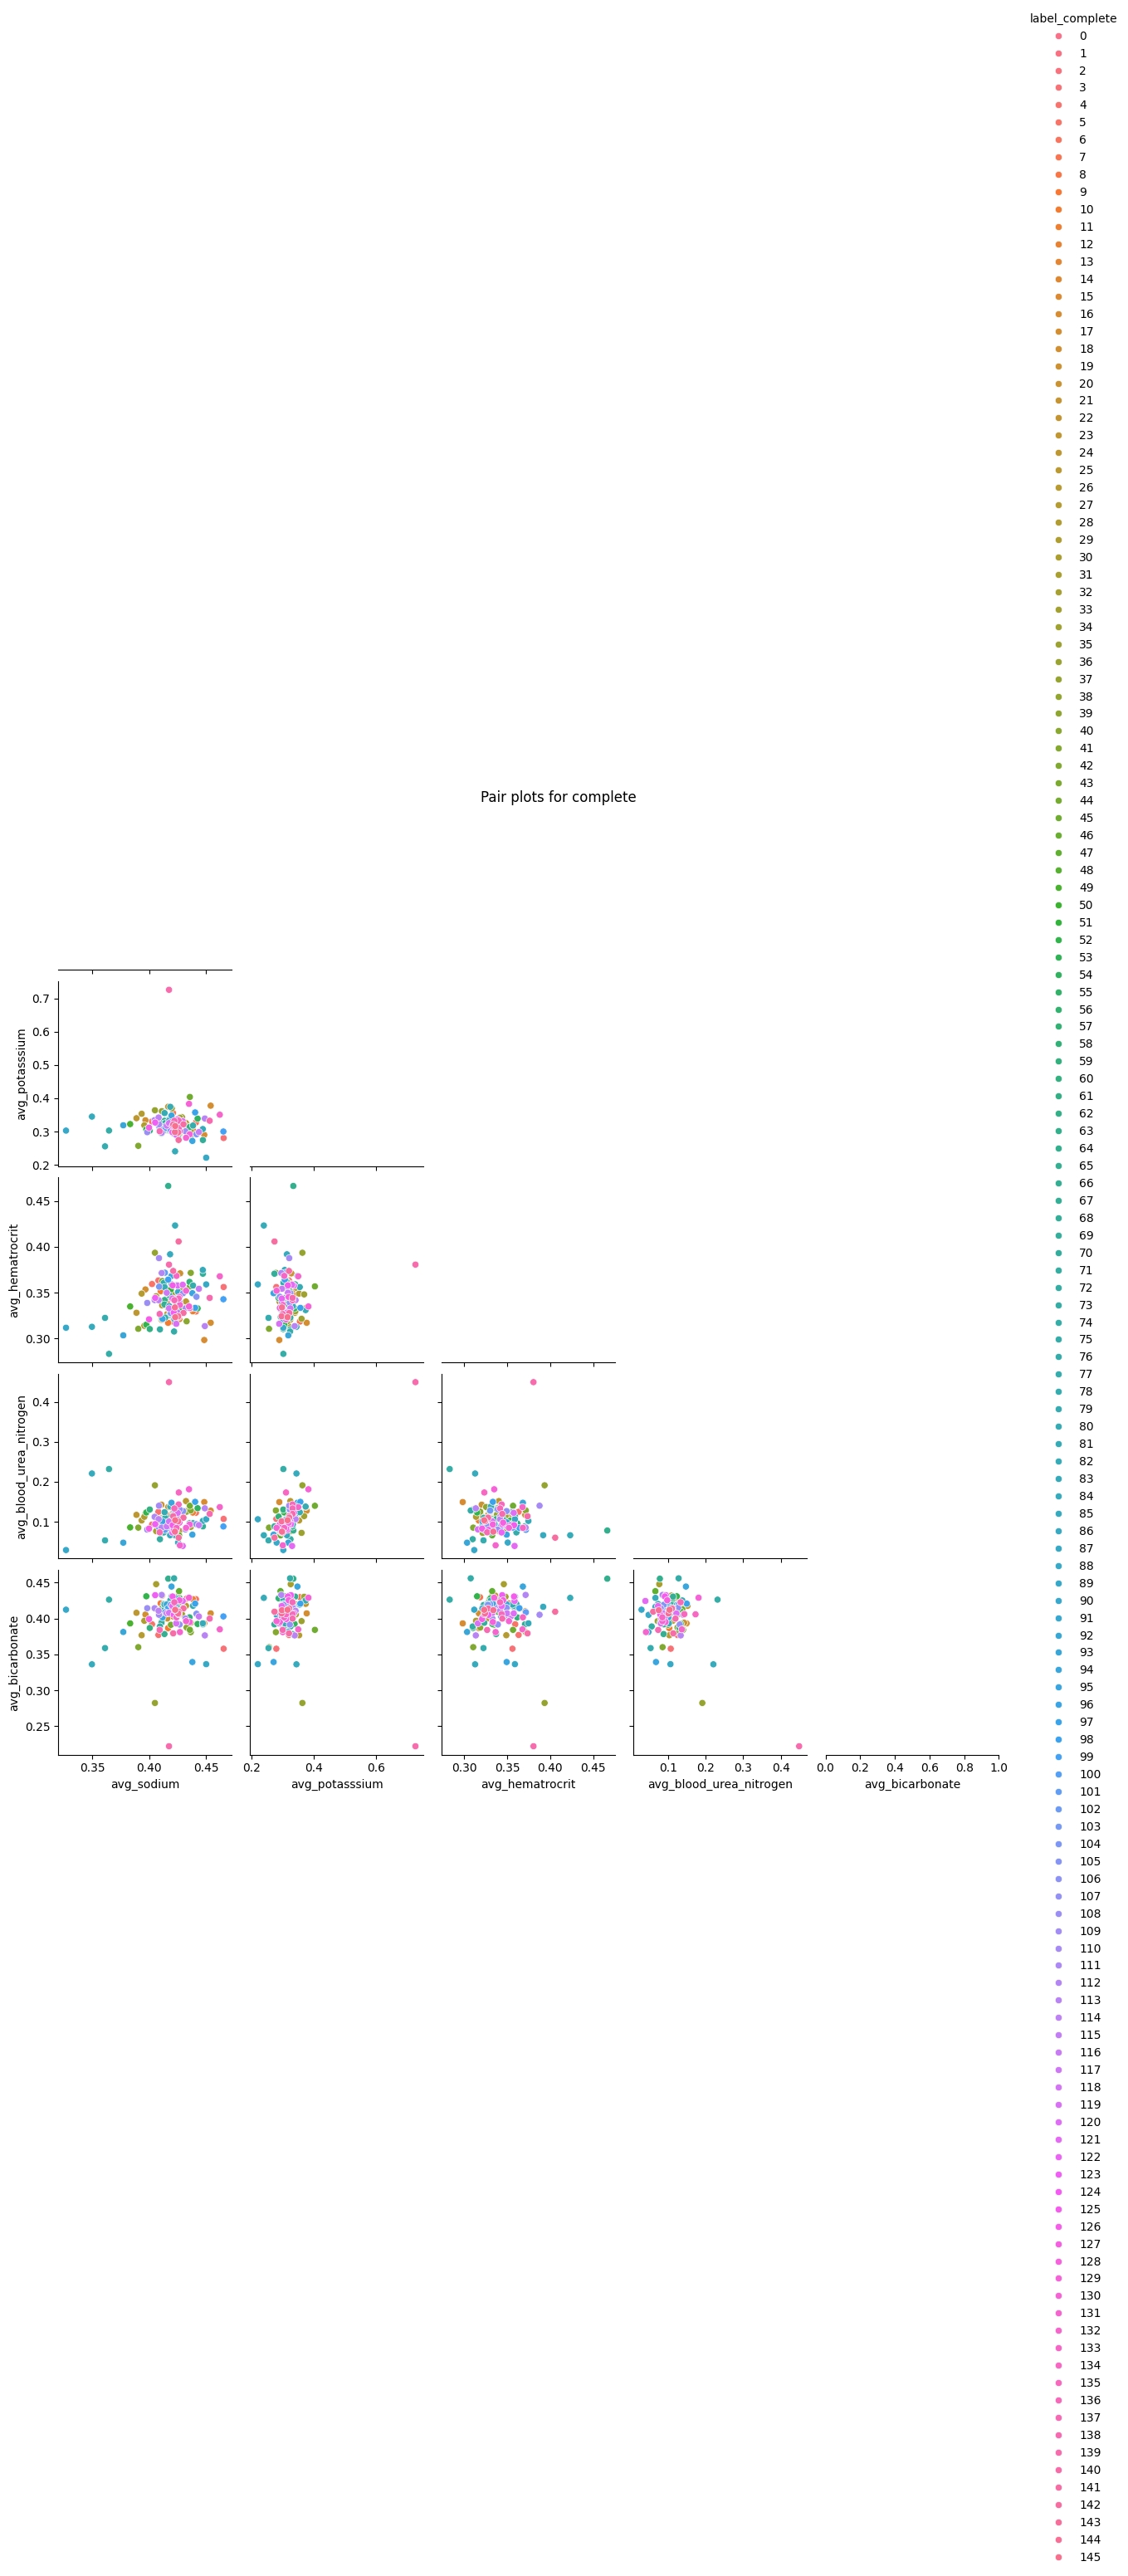

In [5]:
for method_label in ["labels_kmeans", "label_average", "label_ward", "label_complete"]:

  # finding centroid/mean value of all the data points in a cluster
  model_df = df[vitals_cols].groupby(method_label).mean()
  model_df = model_df.reset_index()

  cols_with_most_variance = ["avg_sodium", "avg_potasssium", "avg_hematrocrit",
                             "avg_blood_urea_nitrogen", "avg_bicarbonate",]

  colors = sns.color_palette("husl", n_colors=len(model_df))
  plt.figure(dpi=300)
  g = sns.pairplot(model_df, hue=method_label, vars=cols_with_most_variance,
               corner=True, palette=colors)

  g.fig.suptitle(f"Pair plots for {method_label.split('_')[-1]}")
  plt.savefig(f"pair_plots_{method_label}.jpeg")